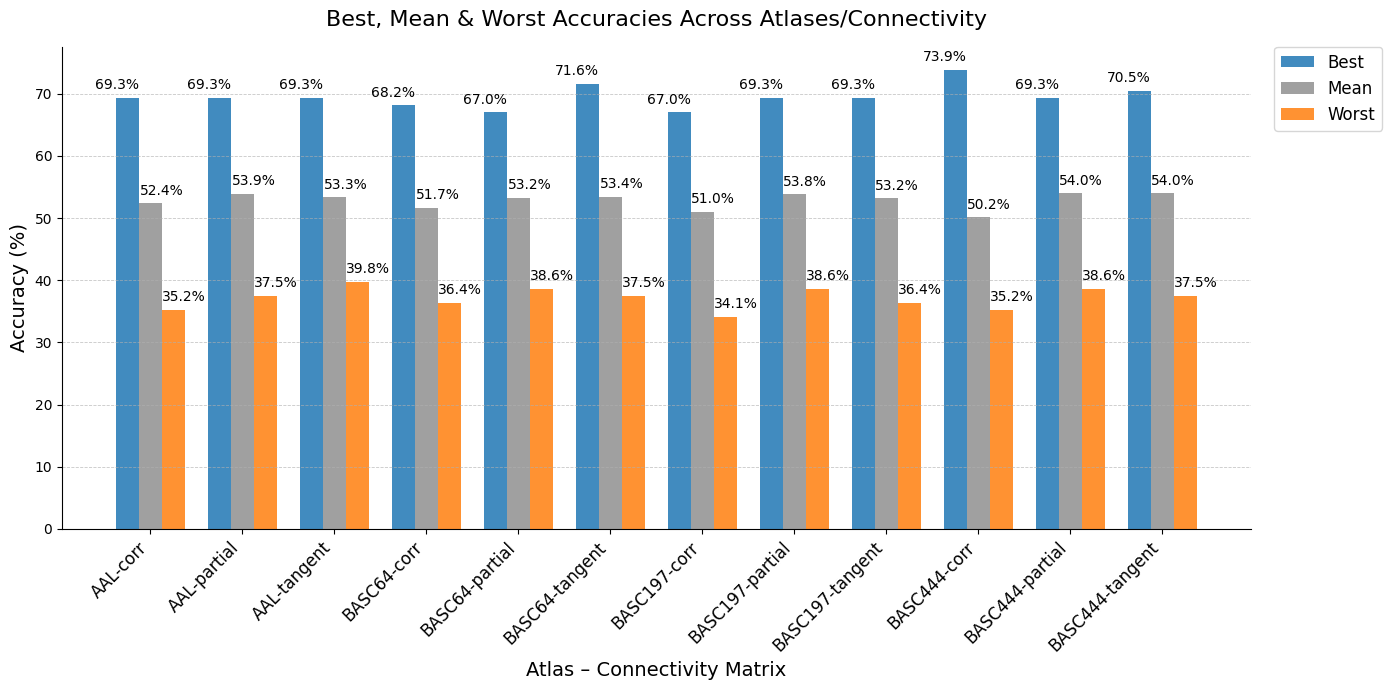

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# ─── INPUT FILES & LABELS ───
file_paths = [
    "./accuracy_vector_aal(500t-corr).npy",
    "./accuracy_vector_aal(500t-part).npy",
    "./accuracy_vector_aal(500t-tang).npy",
    
    "./accuracy_vector_basc64(500t-corr).npy",
    "./accuracy_vector_basc64(500t-part).npy",
    "./accuracy_vector_basc64(500t-tang).npy",
    
    "./accuracy_vector_basc197(500t-corr).npy",
    "./accuracy_vector_basc197(500t-part).npy",
    "./accuracy_vector_basc197(500t-tang).npy",

    "./accuracy_vector_basc444(500t-corr).npy",
    "./accuracy_vector_basc444(500t-part).npy",
    "./accuracy_vector_basc444(500t-tang).npy",
]

labels = [
    "AAL-corr", "AAL-partial", "AAL-tangent",
    "BASC64-corr", "BASC64-partial", "BASC64-tangent",
    "BASC197-corr", "BASC197-partial", "BASC197-tangent",
    "BASC444-corr", "BASC444-partial", "BASC444-tangent",
]

# ─── COMPUTE BEST, MEAN & WORST ACCURACIES ───
best_accs = []
mean_accs = []
worst_accs = []

for fp in file_paths:
    acc = np.load(fp)
    best_accs.append(np.max(acc) * 100)
    mean_accs.append(np.mean(acc) * 100)
    worst_accs.append(np.min(acc) * 100)

# ─── PLOT GROUPED BAR CHART (Best, Mean, Worst) ───
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))

bars_best  = ax.bar(x - width, best_accs,  width, label='Best',  alpha=0.85)
bars_mean  = ax.bar(x,         mean_accs, width, label='Mean',  alpha=0.75, color='gray')
bars_worst = ax.bar(x + width, worst_accs, width, label='Worst', alpha=0.85)

# Styling
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_xlabel('Atlas – Connectivity Matrix', fontsize=14)
ax.set_title('Best, Mean & Worst Accuracies Across Atlases/Connectivity', fontsize=16, pad=15)
ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)

# ─── ANNOTATE BARS WITH OFFSETS TO AVOID OVERLAP ───
w = bars_best[0].get_width()  # bar width in data units (not used directly for offset points)
# Define (x_offset, y_offset) in display points for Best, Mean, Worst
offsets = [(-w*30, 4), (8, 4), (w*30, 4)]  # multiply w by 20 to approximate point offset

for bars, (x_off, y_off) in zip([bars_best, bars_mean, bars_worst], offsets):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{height:.1f}%',
            xy=(bar.get_x() + w/2, height),     # anchor at center-top of bar
            xytext=(x_off, y_off),              # shift horizontally & vertically
            textcoords="offset points",
            ha='center', va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()